In [3]:
from scipy import linalg as la
from scipy import optimize
import sympy as sm
sm.init_printing()
import matplotlib.pyplot as plt
import numpy as np
sm.init_printing(use_latex='mathjax')

In [2]:
A=sm.Matrix([[2,3],[5,4]])
b=sm.Matrix([4,3])
A.rank()
A.condition_number()
float(A.condition_number())
#sm.N(_)# es el valor numer de A.cond.number
#A.norm()
#float(A.norm())

7.582401374401513

Podemos obtener lo mismo si usamos  $\color{red}{Numpy}$

In [3]:
A=np.array([[2,3],[5,4]])
b=np.array([4,3])
np.linalg.matrix_rank(A)
np.linalg.cond(A)
np.linalg.norm(A)

7.3484692283495345

In [4]:
A=sm.Matrix([[2,3],[5,4]])
L,U,_=A.LUdecomposition()

In [5]:
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [6]:
U

⎡2   3  ⎤
⎢       ⎥
⎣0  -7/2⎦

In [7]:
L*U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [8]:
A=sm.Matrix([[2,3],[5,4]])
b=sm.Matrix([4,3])
x=A.LUsolve(b); x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [9]:
P,L,U=la.lu(A)
L , U, L*U

(array([[1. , 0. ],
        [0.4, 1. ]]),
 array([[5. , 4. ],
        [0. , 1.4]]),
 array([[5. , 0. ],
        [0. , 1.4]]))

In [10]:
A=np.array([[2,3],[5,4]])
b=np.array([4,3])
la.solve(A, b)

array([-1.,  2.])

Resolver $x_1+\sqrt{p}x_2=1\;,\;x_1+\displaystyle\frac{1}{\sqrt{p}}x_2=2$

In [11]:
p=sm.symbols('p', positive=True)
A=sm.Matrix([[1,sm.sqrt(p)],[1,1/sm.sqrt(p)]])
b=sm.Matrix([1,2])
x=A.solve(b)
x

⎡2⋅p - 1 ⎤
⎢─────── ⎥
⎢ p - 1  ⎥
⎢        ⎥
⎢   1    ⎥
⎢────────⎥
⎢      1 ⎥
⎢-√p + ──⎥
⎣      √p⎦

Comparación entre solución simbolica y la numérica

Text(0.5, 0, '$x$')

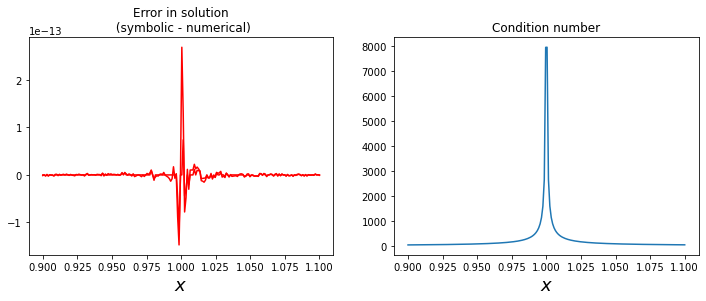

In [12]:
#problema simbolico
p=sm.symbols('p', positive=True)
A=sm.Matrix([[1,sm.sqrt(p)],[1,1/sm.sqrt(p)]])
b=sm.Matrix([1,2])
x_sym_sol=A.solve(b)
Acond=A.condition_number().simplify()
#problema numerico
AA=lambda p: np.array([[1,np.sqrt(p)],[1,1/np.sqrt(p)]])
bb=np.array([1,2])
x_num_sol = lambda p: np.linalg.solve(AA(p),bb)
#diferencia grafica entre soluc simbolica y numerica
fig, axes = plt.subplots(1,2,figsize=(12,4))

p_vec=np.linspace(0.9,1.1,200)
for n in range(2):
    x_sym=np.array([x_sym_sol[n].subs(p,pp).evalf() for pp in p_vec])
    x_num=np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num-x_sym)/x_sym,'r')
axes[0].set_title('Error in solution\n (symbolic - numerical)')
axes[0].set_xlabel(r'$x$', fontsize=18)

axes[1].plot(p_vec,[Acond.subs(p,pp).evalf() for pp in p_vec])                
axes[1].set_title('Condition number')
axes[1].set_xlabel(r'$x$', fontsize=18) 

$\left\{\begin{array}{lcl}
x_1+2x_2+3x_3&=&7\\
4x_1+5x_2+6x_3&=&8
\end{array}\right.
$

In [13]:
x_vars = sm.symbols('x_1,x_2,x_3')
A=sm.Matrix([[1,2,3],[4,5,6]])
x=sm.Matrix(x_vars)
b=sm.Matrix([7,8])
sm.solve(A*x-b,x_vars)

{x₁: x₃ - 19/3, x₂: 20/3 - 2⋅x₃}

In [14]:
a,b=sm.symbols('a,b')
H=sm.Matrix([[a,b],[b,-a]])
H.eigenvals()
H.eigenvects()

⎡⎛                  ⎡⎡       _________⎤⎤⎞  ⎛                 ⎡⎡       ________
⎢⎜    _________     ⎢⎢      ╱  2    2 ⎥⎥⎟  ⎜   _________     ⎢⎢      ╱  2    2
⎢⎜   ╱  2    2      ⎢⎢a   ╲╱  a  + b  ⎥⎥⎟  ⎜  ╱  2    2      ⎢⎢a   ╲╱  a  + b 
⎢⎜-╲╱  a  + b  , 1, ⎢⎢─ - ────────────⎥⎥⎟, ⎜╲╱  a  + b  , 1, ⎢⎢─ + ───────────
⎢⎜                  ⎢⎢b        b      ⎥⎥⎟  ⎜                 ⎢⎢b        b     
⎢⎜                  ⎢⎢                ⎥⎥⎟  ⎜                 ⎢⎢               
⎣⎝                  ⎣⎣       1        ⎦⎦⎠  ⎝                 ⎣⎣       1       

_⎤⎤⎞⎤
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
─⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎥⎥⎟⎥
 ⎦⎦⎠⎦

In [15]:
H1=sm.Matrix([[1,3,5],[3,5,3],[5,3,9]])# es una matriz simétrica
H1.eigenvals()# sus eigenvals deben ser reales pero con sympy se ven complicados

⎧                     _________________                                       
⎪    ⎛  1   √3⋅ⅈ⎞    ╱      4⋅√28257⋅ⅈ                     59                 
⎪5 + ⎜- ─ - ────⎟⋅3 ╱  45 + ──────────  + ────────────────────────────────────
⎨    ⎝  2    2  ⎠ ╲╱            9                            _________________
⎪                                           ⎛  1   √3⋅ⅈ⎞    ╱      4⋅√28257⋅ⅈ 
⎪                                         3⋅⎜- ─ - ────⎟⋅3 ╱  45 + ────────── 
⎩                                           ⎝  2    2  ⎠ ╲╱            9      

                                                                 _____________
                          59                    ⎛  1   √3⋅ⅈ⎞    ╱      4⋅√2825
: 1, 5 + ──────────────────────────────────── + ⎜- ─ + ────⎟⋅3 ╱  45 + ───────
                            _________________   ⎝  2    2  ⎠ ╲╱            9  
           ⎛  1   √3⋅ⅈ⎞    ╱      4⋅√28257⋅ⅈ                                  
         3⋅⎜- ─ + ────⎟⋅3 ╱  45 + ──────────       

In [16]:
A=np.array([[1,3,5],[3,5,3],[5,3,9]]) # la misma matriz simétrica de arriba
evals, evecs=la.eig(A)
A

array([[1, 3, 5],
       [3, 5, 3],
       [5, 3, 9]])

In [17]:
evals# eigenvals de A mas sencillos con Scipy

array([13.35310908+0.j, -1.75902942+0.j,  3.40592034+0.j])

In [18]:
evecs# eigenvects mas sencillos con Scipy

array([[ 0.42663918,  0.90353276, -0.04009445],
       [ 0.43751227, -0.24498225, -0.8651975 ],
       [ 0.79155671, -0.35158534,  0.49982569]])

In [19]:
la.eigvalsh(A)# esto para matrices hermit o simetricas

array([-1.75902942,  3.40592034, 13.35310908])

In [20]:
la.eigh(A)# para hermit y simetricas

(array([-1.75902942,  3.40592034, 13.35310908]),
 array([[ 0.90353276, -0.04009445, -0.42663918],
        [-0.24498225, -0.8651975 , -0.43751227],
        [-0.35158534,  0.49982569, -0.79155671]]))

In [21]:
x=sm.symbols('x')
#sm.solveset(sm.sin(x)-sm.cos(x),x)
sm.solve(sm.sin(x)-sm.cos(x),x)

⎡π⎤
⎢─⎥
⎣4⎦

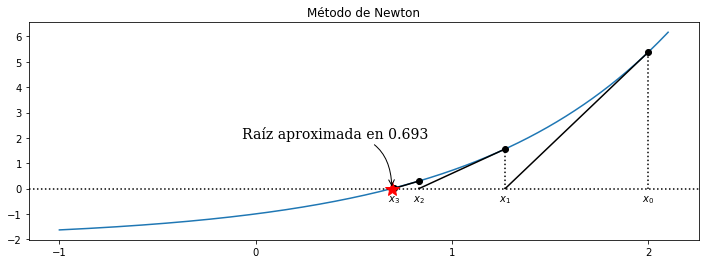

In [22]:
#defino función, tolerancia y punto inicio
tol = 0.01
xk=2
s_x=sm.symbols('x')
s_f=sm.exp(x)-2

f=lambda x:sm.lambdify(s_x,s_f,'numpy')(x)
fp=lambda x: sm.lambdify(s_x,sm.diff(s_f,s_x),'numpy')(x)

x=np.linspace(-1,2.1,1000)
#grafico para ver la raíz hallada
fig, ax= plt.subplots(1,1,figsize=(12,4))

ax.plot(x,f(x))
ax.axhline(0,ls=':', color='k')

#método iterativo hasta la tolerancia deseada
n=0
while f(xk)> tol:
    xk_new=xk-f(xk)/fp(xk)
    
    ax.plot([xk,xk],[0,f(xk)],'k',ls=':')
    ax.plot(xk,f(xk),'ko')
    ax.text(xk,-.5,r'$x_%d$' % n, ha='center')
    ax.plot([xk,xk_new],[f(xk),0],'k-')
    
    xk=xk_new
    n+=1
    
ax.plot(xk,f(xk),'r*',markersize=15)    
ax.annotate('Raíz aproximada en %.3f'% xk, 
           fontsize=14, family='serif',
           xy=(xk,f(xk)), xycoords='data',
           xytext=(-150,+50), textcoords='offset points',
           arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-.5'))

ax.set_title('Método de Newton')
ax.set_xticks([-1,0,1,2])

# Cap. 6 Optimización

pip install cvxopt

In [23]:
from scipy import optimize
import cvxopt
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')

In [24]:
r,h=sm.symbols('r,h')
Area=2*sm.pi*r**2+2*sm.pi*r*h
Volumen=sm.pi*r**2*h
h_r=sm.solve(Volumen-1)[0]#h_r es una lista de un solo elemento
Area_r=Area.subs(h_r)#el h_r se sustituye en Area. Queremos minimizar Area_r
rsol=sm.solve(Area_r.diff(r))[0]#rsol es una lista y se elije el primero real.
rsol

   2/3 
  2    
───────
  3 ___
2⋅╲╱ π 

In [25]:
rsol.evalf()#nos dá el valor aproximado del anterior resultado

0.541926070139289

In [26]:
Area_r.diff(r,2).subs(r,rsol)#En la 2da derivada de Area_r
                            #sustitutimos en lugar de r por
                           #el valor rsol.

12⋅π

|como en la linea anterior la 2da derivada salió positivo
entonces es un mínimo. Luego para saber cuál es el minimo pedido
se debe reemplazar rsol en Area_r

In [27]:
Area_r.subs(r,rsol)

  3 ___ 3 ___
3⋅╲╱ 2 ⋅╲╱ π 

In [28]:
Area_r.subs(r,rsol).evalf()

5.53581044593209

Ahora usemos $\color{red}{\text{ optimize.brent}}$ para resolver lo anterior

In [29]:
def f(r):
    return 2*np.pi*r**2+2/r #es lo mismo que Area_r de arriba
r_min=optimize.brent(f, brack=(0.1,4))
r_min#Es el valor donde se alcanza el mínimo

0.5419260772557135

In [30]:
f(r_min)#es el valor mínimo de la función

5.535810445932086

Para funciones escalares podemos usar $\color{blue}{\text{optimize.minimize_scalar}}$

In [31]:
optimize.minimize_scalar(f, bracket=(0.1,5))

     fun: 5.535810445932086
    nfev: 17
     nit: 13
 success: True
       x: 0.5419260648976671

## Minizar:  $f(x_1,x_2)=(x_1-1)^4+5(x_2-1)^2-2x_1x_2$

In [32]:
x1,x2=sm.symbols('x_1,x_2')
f_sym=(x1-1)**4+5*(x2-1)**2-2*x1*x2
fprime_sym = [f_sym.diff(x_)for x_ in (x1,x2)]# devuelve el gradiente en una fila
#Gradiente
sm.Matrix(fprime_sym)# devuelve gradiente en una columna
fhess_sym=[[f_sym.diff(x1_,x2_) for x1_ in (x1,x2)] for x2_ in (x1,x2)]# es el Hessiano pero dada en lista con dos sublistas
#Hessiano
sm.Matrix(fhess_sym)# es el Hessiano dado como matriz

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

In [33]:
f_lmbda=sm.lambdify((x1,x2),f_sym, 'numpy')
fprime_lmbda=sm.lambdify((x1,x2),fprime_sym,'numpy')
fhess_lmbda=sm.lambdify((x1,x2),fhess_sym, 'numpy')

In [34]:
def func_XY_to_X_Y(f):
    """Cambiamos f(X) por f(X[0],X[1])"""
    return lambda X: np.array(f(X[0],X[1]))
f=func_XY_to_X_Y(f_lmbda)
fprime=func_XY_to_X_Y(fprime_lmbda)
fhess=func_XY_to_X_Y(fhess_lmbda)

In [35]:
x_opt = optimize.fmin_ncg(f,(0,0), fprime=fprime, fhess=fhess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8


# Cap 7 Interpolación

In [33]:
from scipy import interpolate
from numpy import polynomial as P
import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

In [61]:
p1=P.Polynomial([5,-2,1])
p1#en [5,-2,1] 5 es term ind, -2 coef de x , etc

Polynomial([ 5., -2.,  1.], domain=[-1,  1], window=[-1,  1])

In [62]:
p2=P.Polynomial.fromroots([-1,1])
"""para construir polinomios a partir de sus raices"""
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [63]:
p1.roots()

array([1.-2.j, 1.+2.j])

In [64]:
p2.roots()

array([-1.,  1.])

In [65]:
p3=P.Polynomial.fromroots([-1,-1,2,3,1])
"""construimos un polinomio que tenga por raices a 
numeros -1,-1,2,3,1"""
p3

Polynomial([-6., -1., 10.,  0., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [66]:
#p1(-3)#es para evaluar el polinomio p1: x^2-2x+5 en x=-3
p1(np.array([0,-1,1,4]))#para evaluar en 0,-1,1,4

array([ 5.,  8.,  4., 13.])

In [67]:
q1=P.Polynomial.fromroots([1,2,3])#q1=-6+11x-6x^2+x^3
q2=P.Polynomial.fromroots([2])#q2=-2+x
q3=q1//q2 # // es para dividir polinomios
q3

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

In [68]:
q2*q1#multiplicación de polinomios

Polynomial([ 12., -28.,  23.,  -8.,   1.], domain=[-1.,  1.], window=[-1.,  1.])

In [69]:
q1+q2

Polynomial([-8., 12., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.])

## Polinomio de interpolación
Queremos hallar un polinomio que interpole los puntos
$(1,1),(2,3),(3,5), (4,4)$. Construimos primero los numpy array para x e y, luego construimos el polinomio de grado 3 (numero de datos menos 1) en la base de potencias $f(x)=\sum_{i=1}^{4}c_1x^{i-1}=c_1x^0+c_2x^1+c_3x^2+c_4x^3$ y hallamos la matriz de Vandermonde A para resolver Ac=y ó $c=A^{-1}y$

In [34]:
x=np.array([1,2,3,4])
y=np.array([1,3,5,4])
deg=len(x)-1
A=P.polynomial.polyvander(x,deg)
A

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.],
       [ 1.,  4., 16., 64.]])

In [35]:
c=la.solve(A,y)
c# se encuentra c_0,c_1,c_2 y c_3

array([ 2. , -3.5,  3. , -0.5])

Resulta el polinomio interpolante 
$f(x)=2-3.5x+3x^2-0.5x^3$

In [36]:
f=P.Polynomial(c)# con c hallado escribimos f(x)
f(np.array([1,2,3,4,2.5]))# podemos evaluar en cualquier numero o array

array([1.    , 3.    , 5.    , 4.    , 4.1875])

Construyamos la gráfica del polinomio interpolante

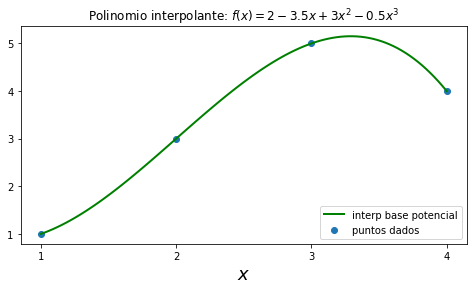

In [38]:
%matplotlib inline
from matplotlib import rc
xx=np.linspace(x.min(), x.max(),100)#desde el minimo valor de x a su maximo valor
fig, ax = plt.subplots(1,1,figsize=(8,4))
ax.plot(xx,f(xx),'g',lw=2,label='interp base potencial')
ax.scatter(x,y,label='puntos dados')
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)
ax.legend(loc=4)
ax.set_xticks(x)#usa los puntos de x como ticks
ax.set_xlabel('$x$', fontsize=18)
ax.set_title('Polinomio interpolante: $f(x)=2-3.5x+3x^2-0.5x^3$' )
#plt.grid()
plt.show()

Polinomio de interpolación para la función de  Runge

In [39]:
def runge(x):
    return 1/(1+25*x**2)
def runge_interpolate(n):
    x=np.linspace(-1,1,n)
    p=P.Polynomial.fit(x,runge(x), deg=n)
    return x,p

C:\Users\Teodoro\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)
C:\Users\Teodoro\anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1361: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


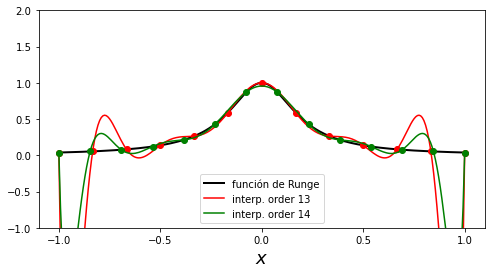

In [44]:
xx=np.linspace(-1,1,250)
fig, ax =plt.subplots(1,1,figsize=(8,4))
ax.plot(xx,runge(xx), 'k', lw=2, label='función de Runge')
#interpolación de orden 13 de la función Runge
n=13
x,p=runge_interpolate(n)
ax.plot(x,runge(x), 'ro')
ax.plot(xx,p(xx),'r',label='interp. order %d' % n)
# interpolación de orden 14 de la función Runge
n=14
x,p=runge_interpolate(n)
ax.plot(x,runge(x), 'go')
ax.plot(xx,p(xx),'g',label='interp. order %d' % n)
ax.legend(loc=8)
ax.set_xlim(-1.1,1.1)
ax.set_ylim(-1,2)
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_xlabel(r'$x$', fontsize=18)
plt.show()

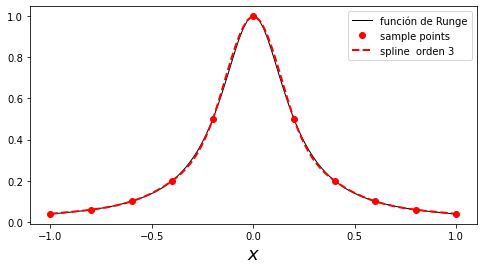

In [42]:
x=np.linspace(-1,1,11)
y=runge(x)
f_i=interpolate.interp1d(x,y,kind=3)
xx=np.linspace(-1,1,100)
fig, ax=plt.subplots(figsize=(8,4))
ax.plot(xx,runge(xx),'k',lw=1,label='función de Runge')
ax.plot(x,y,'ro', label='sample points')
ax.plot(xx,f_i(xx),'r--',lw=2, label='spline  orden 3')
ax.legend()
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_xlabel(r'$x$', fontsize=18)
plt.show()

ValueError: Odd degree for now only. Got 6.

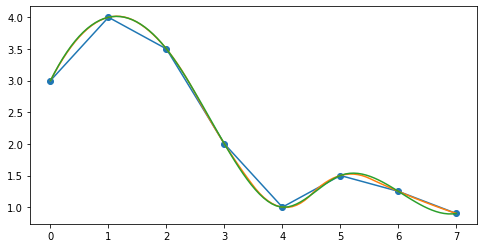

In [43]:
x=np.array([0,1,2,3,4,5,6,7])
y=np.array([3,4,3.5,2,1,1.5,1.25,0.9])
xx=np.linspace(x.min(),x.max(),100)
fig, ax =plt.subplots(figsize=(8,4))
ax.scatter(x,y)

for n in [1,2,3,6]:
    f=interpolate.interp1d(x,y,kind=n)
    ax.plot(xx,f(xx),label='order %d' % n)
    
ax.legend()
ax.set_xlabel(r"$x$", fontsize=18)

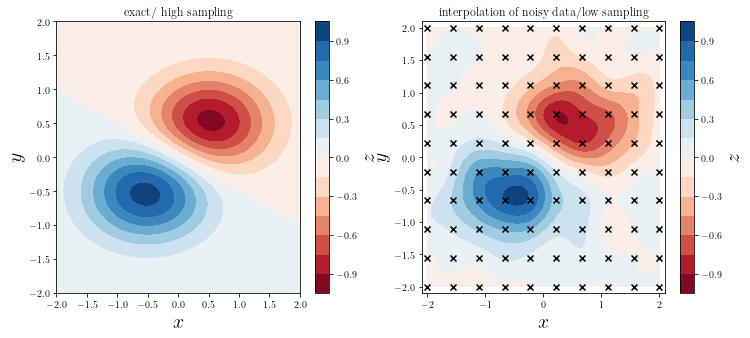

In [112]:
x=y=np.linspace(-2,2,10)#x e y toman vlaores de -2 a 2
def f(x,y):
    return np.exp(-(x+.5)**2-2*(y+.5)**2)-np.exp(-(x-.5)**2-2*(y-.5)**2)
X,Y=np.meshgrid(x,y)
#simulación en los puntos X,Y
Z=f(x,Y)+0.05*np.random.randn(*X.shape)
f_i=interpolate.interp2d(x,y,Z, kind='cubic')
xx=yy=np.linspace(x.min(),x.max(),100)
ZZi=f_i(xx,yy)
XX,YY=np.meshgrid(xx,yy)
fig, axes=plt.subplots(1,2,figsize=(12,5))
#primero plotea el contorno de la funcion exacta
c=axes[0].contourf(XX,YY,f(XX,YY),15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$",fontsize=20)
axes[0].set_ylabel(r"$y$",fontsize=20)
axes[0].set_title("exact/ high sampling")
cb=fig.colorbar(c,ax=axes[0])
cb.set_label(r"$z$",fontsize=20)
#next, plot the contour of the supersampled interpolation
c=axes[1].contourf(XX,YY,ZZi,15,cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1,2.1)
axes[1].set_xlim(-2.1,2.1)
axes[1].set_xlabel("$x$",fontsize=20)
axes[1].set_ylabel("$y$",fontsize=20)
axes[1].scatter(X,Y,marker='x',color='k')
axes[1].set_title("interpolation of noisy data/low sampling")
cb=fig.colorbar(c,ax=axes[1])
cb.set_label(r"$z$",fontsize=20)

# Cap. 8 Integración

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sm
sm.init_printing()

In [2]:
a,b,X=sm.symbols('a,b,x')
f=sm.Function('f')
x=a,(a+b)/2, b# para regla de Simpson
w=[sm.symbols('w_%d'% i) for i in range(len(x))]
w

Dado x y w construimos expresion simbolica de regla de cuadratura

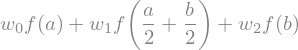

In [3]:
q_rule=sum([w[i]*f(x[i])for i in range(len(x))])
q_rule

In [4]:
phi=[sm.Lambda(X,X**n)for n in range(len(x))]
phi

Integración numérica con Scipy: $\displaystyle\int_{-1}^{1}e^{-x^2}$

In [5]:
def f(x):
    return np.exp(-x**2)
val,err =integrate.quad(f,-1,1)
val

In [6]:
err

$\displaystyle\int_{-1}^{1}ae^{-((x-b)/c)^2}$

In [7]:
def f(x,a,b,c):
    return a*np.exp(-((x-b)/c)**2)
val, err =integrate.quad(f,-1,1,args=(1,2,3))
val

In [8]:
err

$\displaystyle\int_{-\infty}^{\infty}e^{-x^2}dx$

In [9]:
f=lambda x:np.exp(-x**2)
val,err=integrate.quad(f,-np.inf,np.inf)
val

In [10]:
err

La función $\color{blue}{integrate.quad}$ es conveniente para calcular integrales donde el integrando es una función de Python

In [13]:
f=lambda x: 1/np.sqrt(abs(x))
a,b=-1,1
integrate.quad(f,a,b)

<ipython-input-13-f6d0f5dcd7c1>:1: RuntimeWarning: divide by zero encountered in double_scalars
  f=lambda x: 1/np.sqrt(abs(x))
<ipython-input-13-f6d0f5dcd7c1>:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integrate.quad(f,a,b)


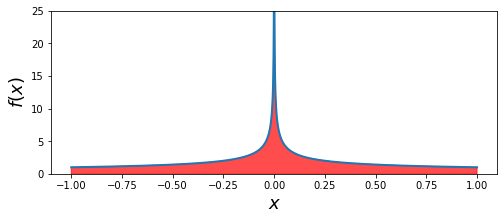

In [25]:
fig, ax=plt.subplots(figsize=(8,3))
x=np.linspace(a,b,10000)
ax.plot(x,f(x),lw=2)
ax.fill_between(x,f(x),color='red', alpha=0.7)#para sombrear la región entre el eje X y la curva (x,f(x))
ax.set_xlabel("$x$",fontsize=18)
ax.set_ylabel("$f(x)$",fontsize=18)
ax.set_ylim(0,25)
plt.show()

In [27]:
integrate.quad(f,a,b,points=[0])#dentro del corchete se pone todos los puntos donde no queremos que se evalúe la integral
                                #por ejemplo donde hay puntos de discontinuidad o donde sea divergente

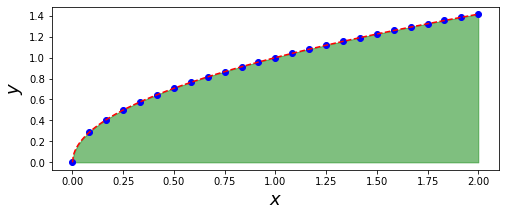

In [66]:
f=lambda x: np.sqrt(x)#(x+np.log(1+x))/(1+x**8)
a,b=0,2
x=np.linspace(a,b,25)
y=f(x)
fig, ax=plt.subplots(figsize=(8,3))
ax.plot(x,y,'bo')
xx=np.linspace(a,b,500)
ax.plot(xx,f(xx),'r--')
ax.fill_between(xx,f(xx),color='green',alpha=0.5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
plt.show()

In [67]:
val_trapz=integrate.trapz(y,x)
val_trapz

In [68]:
val_simps=integrate.simps(y,x)
val_simps

In [69]:
valor_exacto=(2/3)*(b-a)**(3/2)#valor exacto de la integral int_0^2(x^{1/2})
valor_exacto

In [70]:
valor_exacto-val_trapz

In [71]:
valor_exacto-val_simps

## Integración Múltiple

$\int_0^1\!\!\int_0^1e^{-x^2-y^2}dxdy$

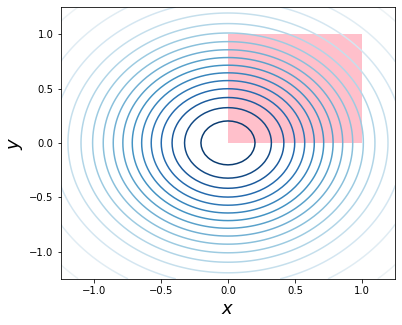

In [90]:
def f(x,y):return np.exp(-x**2-y**2)
fig, ax=plt.subplots(figsize=(6,5))
x=y=np.linspace(-1.25,1.25,75)
X,Y=np.meshgrid(x,y)
ax.contour(X,Y,f(X,Y), 15, cmap=plt.cm.RdBu, vmin=-1,vmax=1)
bound_rect=plt.Rectangle((0,0),1,1,facecolor='pink')
ax.add_patch(bound_rect)
ax.axis('tight')
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)
plt.show()

In [95]:
a,b=0,1
g=lambda x:0
h=lambda x:1
integrate.dblquad(f,a,b,g,h)#nos da el valor de la integral y el error absoluto

Se pudo calcular tambien en la forma

In [100]:
integrate.dblquad(lambda x,y : np.exp(-x**2-y**2),0,1,lambda x: 0, lambda x: 1)

$\int_0^1\!\int_{x-1}^{1-x}e^{-x^2-y^2}$. En el resultado que sigue debe usarse la función $\color{blue}{lambda}$ 

In [5]:
integrate.dblquad(lambda x,y: np.exp(-x**2-y**2),0,1,lambda x: -1+x, lambda x: 1-x)

## Transformada de Laplace

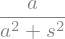

In [48]:
s =sm.symbols('s')
a,t=sm.symbols('a,t', positive=True)
f=sm.sin(a*t)#queremos hallar la T.L de f(t)
F=sm.laplace_transform(f,t,s,noconds=True)#T.L(f(t))= F(s)
F

In [49]:
sm.inverse_laplace_transform(F,s,t, noconds=True)

Podemos hallar T.L. de varias funciones a la vez

Wall time: 2.92 s


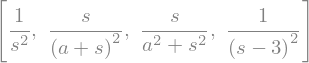

In [20]:
[sm.laplace_transform(f,t,s,noconds=True) for f in [t,(1-a*t)*sm.exp(-a*t),sm.cos(a*t),t*sm.exp(3*t)]]

In [18]:
n=sm.symbols('n', integer=True, positive=True)
sm.laplace_transform(t**n,t,s,noconds=True)

# Cap. 9 EDO

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import sympy as sm
sm.init_printing()

In [23]:
t,k,T0,Ta=sm.symbols('t,k,T_0,T_a')
T=sm.Function('T')

C:\Users\Teodoro\anaconda3\lib\site-packages\sympy\core\relational.py:495: SymPyDeprecationWarning: 

Eq(expr) with rhs default to 0 has been deprecated since SymPy 1.5.
Use Eq(expr, 0) instead. See
https://github.com/sympy/sympy/issues/16587 for more info.

  SymPyDeprecationWarning(


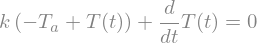

In [24]:
ode=T(t).diff(t)+k*(T(t)-Ta)
sm.Eq(ode)

In [25]:
ode_sol=sm.dsolve(ode)
ode_sol

In [26]:
ics={T(0):T0}
ics

In [27]:
C_eq=sm.Eq(ode_sol.lhs.subs(t,0).subs(ics), ode_sol.rhs.subs(t,0))
C_eq

In [28]:
C_sol=sm.solve(C_eq)
C_sol

In [29]:
ode_sol.subs(C_sol[0])

In [30]:
def apply_ics(sol,ics,x,known_params):
    free_params = sol.free_symbols-set(known_params)
    eqs= [(sol.lhs.diff(x,n)-sol.rhs.diff(x,n)).subs(x,0).subs(ics)
         for n in range(len(ics))]
    sol_params=sm.solve(eqs, free_params)
    return sol.subs(sol_params)
    

In [31]:
ode_sol

In [32]:
apply_ics(ode_sol,ics,t,[k,Ta])